In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [60]:
import warnings
warnings.filterwarnings("ignore")

In [61]:
data = make_blobs(n_samples=5000, n_features=2, centers=2)
x_data = data[0]
y_data = data[1]
print(x_data.shape, y_data.shape)

(5000, 2) (5000,)


In [62]:
print(set(y_data))

{0, 1}


**1. KMeans Clustering**

In [63]:
kmeans = KMeans(n_clusters=3)

In [64]:
kmeans.fit(x_data)

KMeans(n_clusters=3)

In [65]:
print(kmeans.inertia_)

8370.292718996177


In [66]:
print(kmeans.labels_)

[2 1 0 ... 1 1 2]


In [67]:
print(kmeans.cluster_centers_)

[[ 4.84989355 -5.51047494]
 [-5.10612917  9.04518727]
 [ 5.94822095 -4.24366081]]


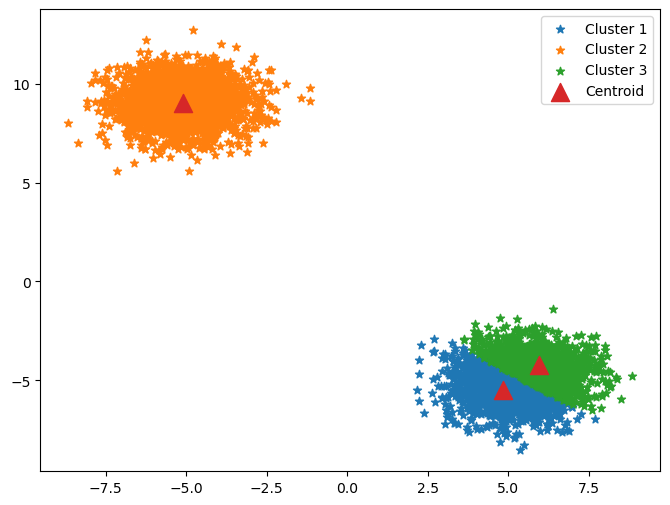

In [68]:
plt.figure(figsize=(8,6))
for i in range(3):
    plt.scatter(x_data[kmeans.labels_==i,0], x_data[kmeans.labels_==i,1], marker="*", label = "Cluster "+str(i+1))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="^",s=170, label="Centroid")
plt.legend()
plt.show()

In [69]:
list_app = []
for i in range(1,12):
    k = KMeans(n_clusters=i)
    k.fit(x_data)
    list_app.append(k.inertia_)

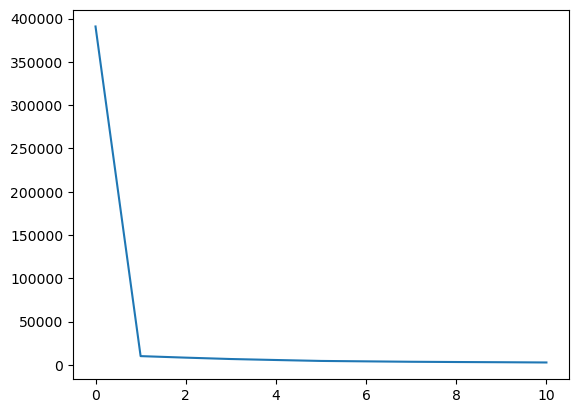

In [70]:
plt.plot(list_app)
plt.show()

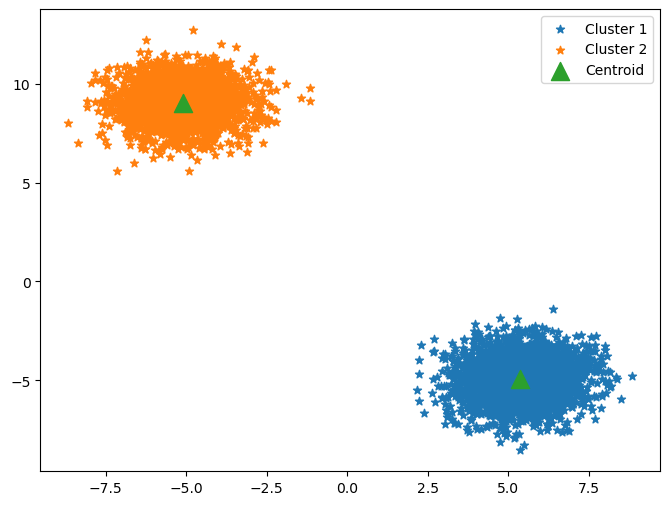

In [71]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x_data)

plt.figure(figsize=(8,6))
for i in range(n_clusters):
    plt.scatter(x_data[kmeans.labels_==i,0], x_data[kmeans.labels_==i,1], marker="*", label = "Cluster "+str(i+1))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="^",s=170, label="Centroid")
plt.legend()
plt.show()

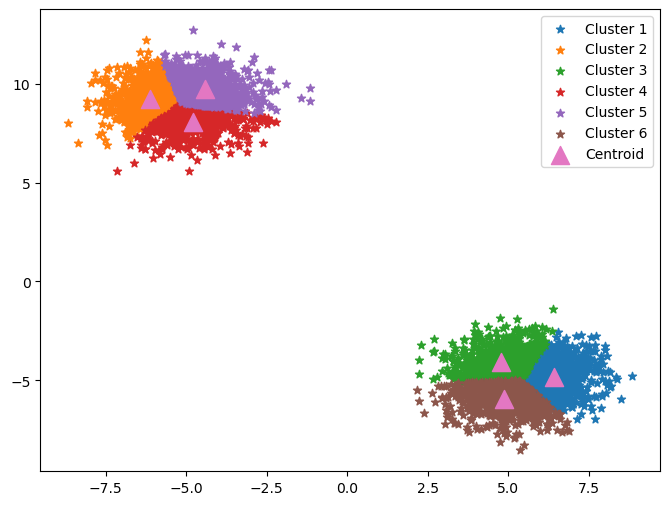

In [72]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x_data)

plt.figure(figsize=(8,6))
for i in range(n_clusters):
    plt.scatter(x_data[kmeans.labels_==i,0], x_data[kmeans.labels_==i,1], marker="*", label = "Cluster "+str(i+1))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="^",s=170, label="Centroid")
plt.legend()
plt.show()

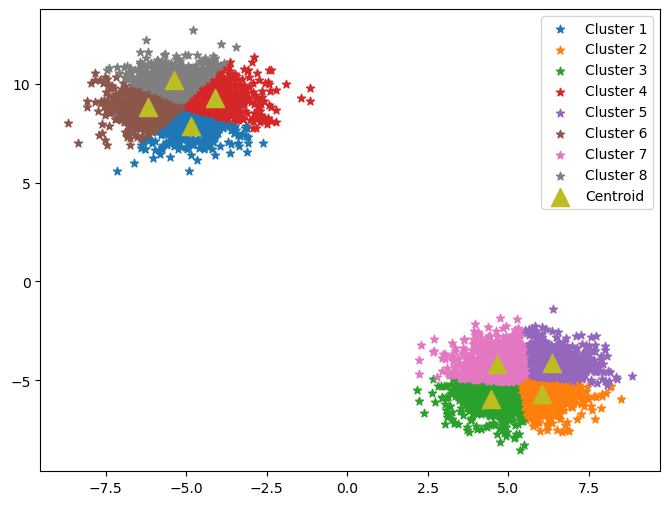

In [73]:
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x_data)

plt.figure(figsize=(8,6))
for i in range(n_clusters):
    plt.scatter(x_data[kmeans.labels_==i,0], x_data[kmeans.labels_==i,1], marker="*", label = "Cluster "+str(i+1))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="^",s=170, label="Centroid")
plt.legend()
plt.show()

**2. Linear Regression**

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.8, random_state=100)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1000, 2) (4000, 2) (1000,) (4000,)


In [75]:
lin_cls = LinearRegression()
lin_cls.fit(x_train, y_train)

LinearRegression()

In [76]:
pred = lin_cls.predict(x_test)
pred = np.array([int(round(i)) for i in pred])
pred[pred==-1]=0
print(pred.shape,y_test.shape)

(4000,) (4000,)


In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [78]:
print(confusion_matrix(pred, y_test))

[[2010    0]
 [   0 1990]]


In [92]:
cm = confusion_matrix(pred, y_test)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

2010 0 0 1990


In [79]:
print(accuracy_score(pred, y_test))

1.0


In [80]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2010
           1       1.00      1.00      1.00      1990

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [81]:
# set(pred)

TPR = TP/(TP+FN) = Recall

In [82]:
TPR = 2004/(2004+1996+0.001)
print(TPR)

0.5009998747500313


FPR = FP/(TN+FP)

In [83]:
FPR = 0/(0+0+0.001)
print(FPR)

0.0


Precision = TP/(TP+FP)

In [84]:
precision = 2004/(2004+0)
print(precision)

1.0


In [85]:
recall = TPR

In [86]:
f1_score = 2/((1/precision)+(1/recall))
print(f1_score)

0.6675548521727428


In [91]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report

# Generate synthetic data for a binary classification problem
# True labels (actual ground truth)
y_true = np.array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

# Predicted labels (model predictions)
y_pred = np.array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1])

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate precision, recall, true positive rate (TPR), and false positive rate (FPR)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
tpr = tp / (tp + fn)  # True Positive Rate (Recall)
fpr = fp / (fp + tn)  # False Positive Rate

# Print the confusion matrix and metrics
print("Confusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall (True Positive Rate): {recall:.2f}")
print(f"False Positive Rate: {fpr:.2f}")
print(f"Accuracy Score: {accuracy_score(y_true, y_pred):.2f}")
print(f"Classification Report: {classification_report(y_true, y_pred)}")

Confusion Matrix:
[[3 2]
 [1 4]]
Precision: 0.67
Recall (True Positive Rate): 0.80
False Positive Rate: 0.40
Accuracy Score: 0.70
Classification Report:               precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10

